# Experiment No. 1

### Name: Vivek Vitthal Avhad (4031)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist             #type: ignore
from tensorflow.keras.models import Model              #type: ignore
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose, Dropout        #type: ignore
from tensorflow.keras.optimizers import Adam            #type: ignore

2025-08-18 17:50:42.596023: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-18 17:50:42.716487: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-18 17:50:42.824292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755519642.920524    4370 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755519642.946994    4370 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755519643.138602    4370 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

In [4]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
encoding_dim = 32

In [6]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

2025-08-18 17:50:47.056862: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001),
loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2757 - val_loss: 0.1874
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1692 - val_loss: 0.1526
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1437 - val_loss: 0.1336
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1283 - val_loss: 0.1214
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1183 - val_loss: 0.1132
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1113 - val_loss: 0.1073
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1060 - val_loss: 0.1025
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1020 - val_loss: 0.0991
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0991 - val_loss: 0.0967
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0972 - val_loss: 0.0952
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0960 - val_loss: 0.0941
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [9]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step


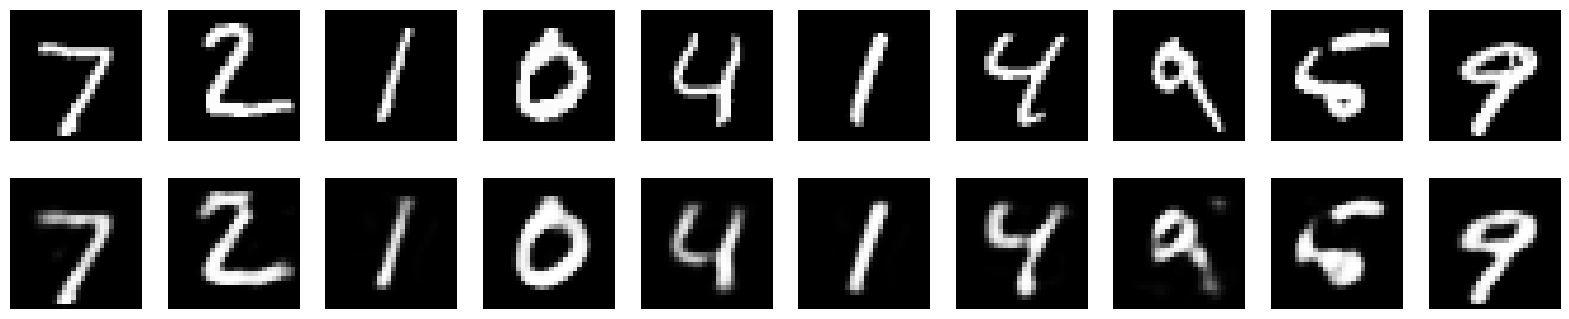

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28),
cmap='gray')
    ax.axis('off')
plt.show()

## Practice Questions:

1. Modify the autoencoder to use convolutional layers (Conv2D and Conv2DTranspose).
2. Try using a different dataset (e.g., Fashion MNIST).
3. Increase the encoding dimension and observe how reconstruction quality changes.
4. Add dropout layers in the encoder and analyze performance.
5. Implement a denoising autoencoder that can reconstruct images from noisy input.

In [11]:
from tensorflow.keras.datasets import fashion_mnist   # Q2: switched to Fashion-MNIST #type:ignore

In [12]:
# Load & preprocess data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test  = x_test.astype("float32") / 255.

In [13]:
# ---- Q1: Use Conv AE (keep image shape 28x28x1) ----
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

In [14]:
# ---- Q5: Add noise (for denoising AE) ----
noise_factor = 0.5
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(size=x_train.shape), 0., 1.)
x_test_noisy  = np.clip(x_test  + noise_factor * np.random.normal(size=x_test.shape), 0., 1.)

In [15]:
# Model (Conv Autoencoder + Dropout)
inp = Input(shape=(28,28,1))
x = Conv2D(32, 3, activation='relu', padding='same')(inp) 
x = MaxPooling2D(2, padding='same')(x)
x = Dropout(0.3)(x)                         # Q4: Dropout
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(2, padding='same')(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)

In [16]:
# latent representation (Q3: "encoding dim" is filters=128 here)
encoded = x

x = Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(encoded)
x = Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

In [17]:
autoencoder = Model(inp, decoded)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')

In [18]:
# Train (Q5: noisy->clean, else normal->normal)
autoencoder.fit(x_train_noisy, x_train,   # noisy input, clean target
epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoencoder.predict(x_test_noisy)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 147s 620ms/step - loss: 0.3637 - val_loss: 0.3139
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 619ms/step - loss: 0.3097 - val_loss: 0.3051
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 616ms/step - loss: 0.3032 - val_loss: 0.3010
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 618ms/step - loss: 0.2998 - val_loss: 0.2987
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 619ms/step - loss: 0.2976 - val_loss: 0.2975
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 619ms/step - loss: 0.2959 - val_loss: 0.2965
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 629ms/step - loss: 0.2946 - val_loss: 0.2943
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 147s 627ms/step - loss: 0.2935 - val_loss: 0.2938
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 604ms/step - loss: 0.2927 - val_loss: 0.2927
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 619ms/step - loss: 0.2920 - val_loss: 0.2920
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


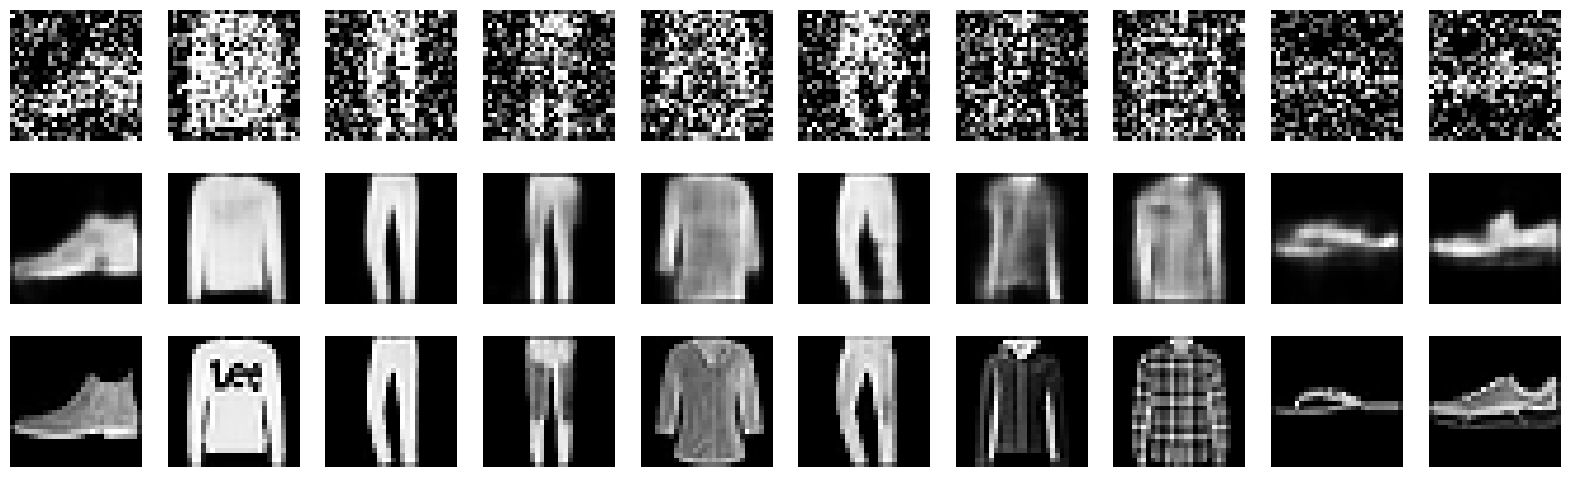

In [19]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    ax.axis('off')
    # Reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    ax.axis('off')
    # Clean original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    ax.axis('off')
plt.show()